# Instacart Basket Data Analysis

### Content 
### 3. Creating an exclusion flag for low-activity customers 
### 4. Customer profiling 
### 4.1. Creating flags for customers' categories  
### 4.1.1 Creating customers' categories by age 
### 4.1.2 Creating customers' categories by income 
### 4.1.3 Creating customers' categories by depenants 
### 4.2. Creating charts for customer distributions by categories (age, income, family status) 
### 4.3. Creating charts for customers' average number of orders by categories (age, income, family status) 
### 4.4. Creating charts for average price in the orders by categories (age, income, family status) 
### 4.5. Creating charts for average number of days since prior order by categories (age, income, family status) ### 4.6. Creating charts for income generated by categories (age, income, family status) 

### Importing libraris

In [4]:
# Import analysis and visualization libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Importing data

In [6]:
# Create Path
path=r'C:\Users\Oksana Stepanova\OneDrive\Документи\Instacart Basket Analysis'

In [8]:
# Import Instacart merged dataframe
df_instacart=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_merged.pkl'))

In [9]:
# Check for imported data
df_instacart.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,spender_flag,median_days_prior_order,order_frequency_flag,gender,states,age,date_joined,number_dependants,family_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [10]:
# Check for imported data
df_instacart.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,spender_flag,median_days_prior_order,order_frequency_flag,gender,states,age,date_joined,number_dependants,family_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


## 3. Creating an exclusion flag for low-activity customers

In [12]:
# Create a new column 'activity_flag' and assign customers activity label 'Low activity' if max order number <5
df_instacart.loc[df_instacart['max_order']<5, 'activity_flag']='Low activity'

In [13]:
# Create a new column 'activity_flag' and assign customers activity label 'High activity' if max order number >=5
df_instacart.loc[df_instacart['max_order']>=5, 'activity_flag']='High activity'

In [14]:
# Check for values in the new column 'activity flag'
df_instacart['activity_flag'].value_counts(dropna=False)

activity_flag
High activity    30959687
Low activity      1440045
Name: count, dtype: int64

In [15]:
# Check for the number of rows and columns after adding 'activity flag' column
df_instacart.shape

(32399732, 32)

In [16]:
# Create a subset of Low activity customers
low_activity_customers=df_instacart.loc[df_instacart['activity_flag']=='Low activity']

In [17]:
# Check for the data in the subset of Low activity customers
low_activity_customers.shape

(1440045, 32)

In [18]:
low_activity_customers['max_order'].describe()

count    1.440045e+06
mean     3.523177e+00
std      4.994919e-01
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      4.000000e+00
Name: max_order, dtype: float64

In [19]:
# Create a subset of Hight activity customers
high_activity_customers=df_instacart.loc[df_instacart['activity_flag']=='High activity']

In [20]:
# Check for the data in the subset of High activity customers
high_activity_customers.shape

(30959687, 32)

In [21]:
high_activity_customers['max_order'].describe()

count    3.095969e+07
mean     3.442621e+01
std      2.489502e+01
min      5.000000e+00
25%      1.400000e+01
50%      2.800000e+01
75%      4.800000e+01
max      9.900000e+01
Name: max_order, dtype: float64

In [22]:
# Export dataframe of low activity customers
low_activity_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers.pkl'))

## 4. Customer profiling

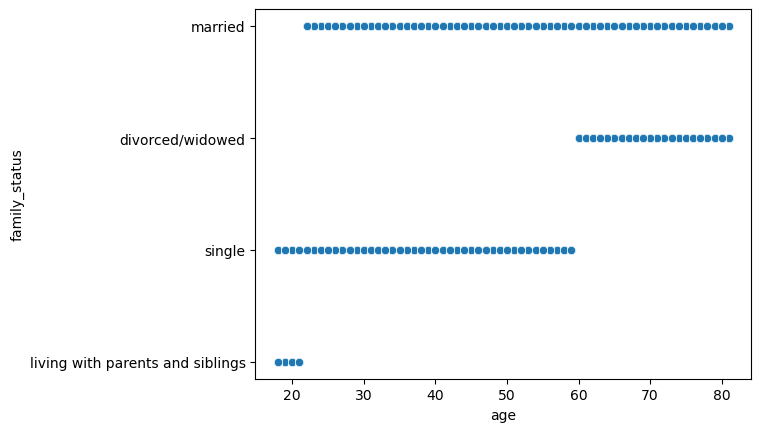

In [24]:
# Create a scatterplot to analyse connections between age and family status
scatterplot_age_family=sns.scatterplot(x='age', y='family', data=df_instacart)

#### By family status we will create two categories: married and single which will include single, divorced and widowed, living with parents and siblings  

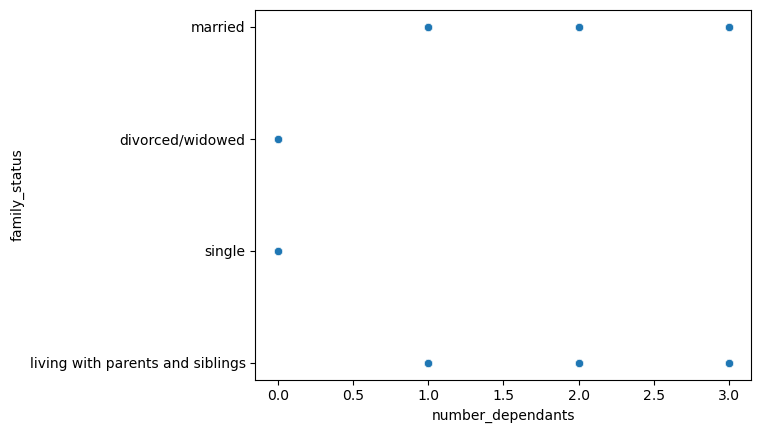

In [35]:
# Create a scatterplot to analyse connections between age and family status
scatterplot_dependants_family=sns.scatterplot(x='number_dependants', y='family_status', data=df_instacart)

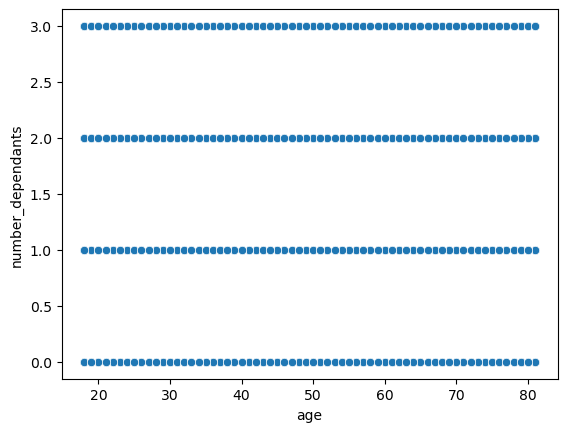

In [37]:
# Create a scatterplot to analyse connections between number of dependants and age
scatterplot_age_dependants=sns.scatterplot(x='age', y='number_dependants', data=df_instacart)

#### We can define two categories of parents by family status: maried and those who lives with parents or siblins. From the point of the age of the parents, regardless of thier age, the customers have reported that they either care givers or live with children. For the purpose of analysis, we can create a category as young parents assuming that their purcahsing patterns could be different that for other customers.

### 4.1. Creating flags for customers' categories  

In [40]:
# Check for the data in the Instacart dataframe
df_instacart.shape

(32399732, 32)

In [41]:
df_instacart.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,median_days_prior_order,order_frequency_flag,gender,states,age,date_joined,number_dependants,family_status,income,activity_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,High activity
1,2398795,1,2,3,7,15.0,False,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,High activity
2,473747,1,3,3,12,21.0,False,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,High activity
3,2254736,1,4,4,7,29.0,False,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,High activity
4,431534,1,5,4,15,28.0,False,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,High activity


### 4.1.1 Creating customers' categories by age

In [43]:
# Create a new column 'age_category' and assign
# young: 35 yo and younger
# adults: 35 - 60 yo
# seniors: 61 and older
df_instacart.loc[df_instacart['age']<=35, 'age_category']='young'
df_instacart.loc[(df_instacart['age']>35) & (df_instacart['age']<=60), 'age_category']='adults'
df_instacart.loc[df_instacart['age']>60, 'age_category']='seniors'

In [45]:
# Check for dataframe shape after adding 'age_category'
df_instacart.shape

(32399732, 33)

In [47]:
# Count variables in 'age_categories'
df_instacart['age_category'].value_counts(dropna=False)

age_category
adults     12673629
seniors    10581161
young       9144942
Name: count, dtype: int64

### 4.1.2 Creating customers' categories by income

In [49]:
# Create a new column 'income_category' and assign
# low income: <= 50k
# medium income: > 50k and <=250k
# high income: > 250k
df_instacart.loc[df_instacart['income']<=50000, 'income_category']='Low income'
df_instacart.loc[(df_instacart['income']>50000) & (df_instacart['income']<=250000), 'income_category']='Medium income'
df_instacart.loc[df_instacart['income']>250000, 'income_category']='High income'

In [50]:
# Check for dataframe shape after adding 'income_category'
df_instacart.shape

(32399732, 34)

In [51]:
# Count variables in 'income_categories'
df_instacart['income_category'].value_counts(dropna=False)

income_category
Medium income    28624955
Low income        3594083
High income        180694
Name: count, dtype: int64

### 4.1.3 Creating customers' categories by depenants

In [70]:
# Create a new column 'parents_category' and assign 'True' if customers have dependants or "False" if they don't have any dependants
df_instacart['parents_category']=df_instacart['number_dependants']>=1

In [71]:
# Check for the data shape
df_instacart.shape

(32399732, 35)

In [72]:
# Count variables in 'income_categories'
df_instacart['parents_category'].value_counts(dropna=False)

parents_category
True     24303457
False     8096275
Name: count, dtype: int64

### 4.2. Creating charts for customer distributions by categories (age, income, family status) 

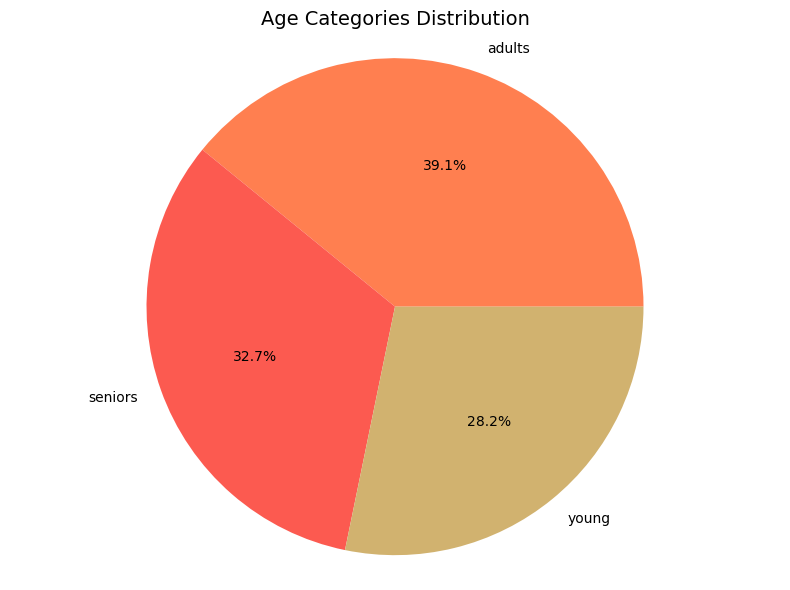

In [61]:
# Calculate percentage distribution by age
age_distribution=(df_instacart['age_category'].value_counts(normalize=True)*100).sort_index()

# Create a pie chart: percentage of customers by age categories
plt.figure(figsize=(8, 6))
pie_age_categories=plt.pie(age_distribution, labels=age_distribution.index, autopct='%1.1f%%', colors=['#ff7f50', '#fc5a50', '#d1b26f'])

# Add title
plt.title('Age Categories Distribution', fontsize=14) 

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Save the pie chart for customers percentage by age
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_age_categories.png'))

# Displaying the pie chart
plt.tight_layout()  
plt.show()

In [60]:
# Save the pie chart for customers percentage by age
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_age_categories.png'))

<Figure size 640x480 with 0 Axes>

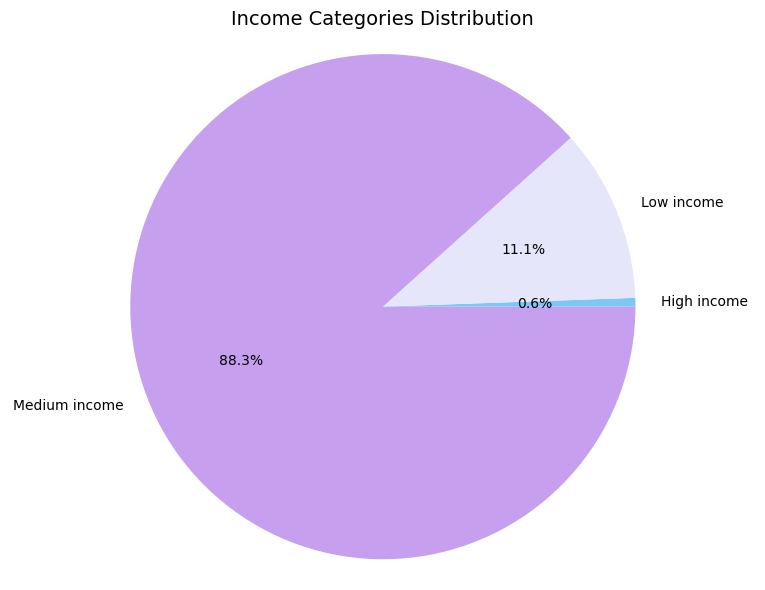

In [62]:
# Calculate percentage distribution by income category
income_distribution=(df_instacart['income_category'].value_counts(normalize=True)*100).sort_index()

# Create a pie chart: percentage of customers by income categories
plt.figure(figsize=(8, 6))
pie_income_categories=plt.pie(income_distribution, labels=income_distribution.index, autopct='%1.1f%%', colors=['#7bc8f6', '#e6e6fa', '#c79fef'])

# Add title
plt.title('Income Categories Distribution', fontsize=14) 

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Save the pie chart for customers percentage by income
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_income_categories.png'))

# Displaying the pie chart
plt.tight_layout()  
plt.show()

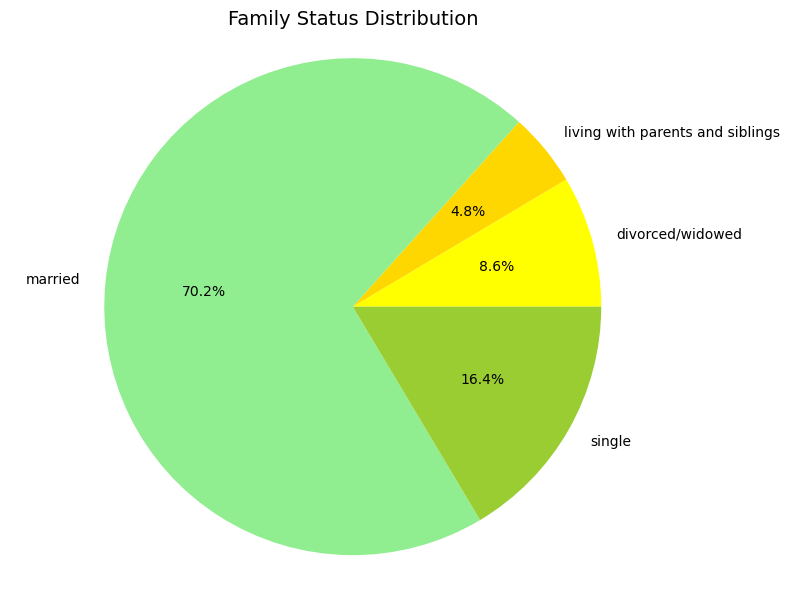

In [66]:
# Calculate percentage distribution by family status
family_status_distribution=(df_instacart['family_status'].value_counts(normalize=True)*100).sort_index()

# Create a pie chart: percentage of customers by family status
plt.figure(figsize=(8, 6))
pie_family_status=plt.pie(family_status_distribution, labels=family_status_distribution.index, autopct='%1.1f%%', colors=['#ffff00', '#ffd700', '#90ee90', '#9acd32'])

# Add title
plt.title('Family Status Distribution', fontsize=14) 

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Save the pie chart for customers percentage by family status
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_family_status.png'))

# Displaying the pie chart
plt.tight_layout()  
plt.show()

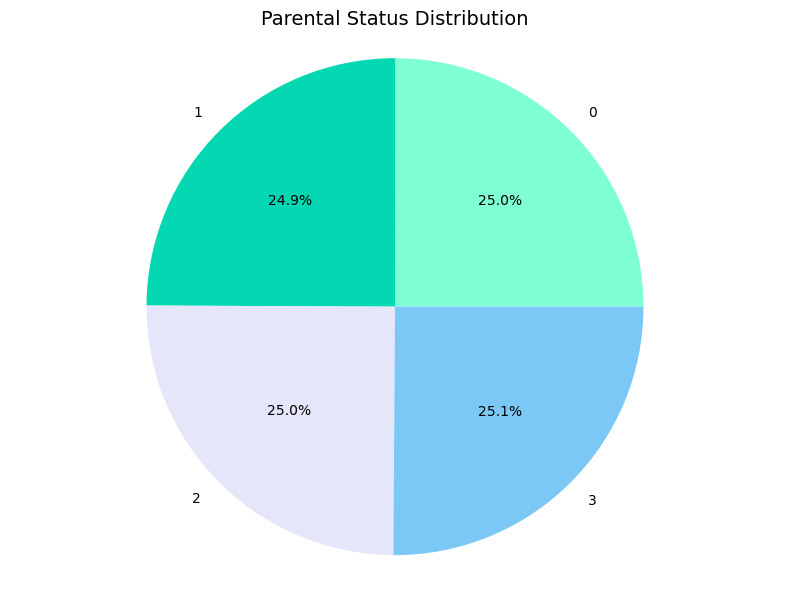

In [69]:
# Calculate percentage distribution by the number of dependants
parents_distribution=(df_instacart['number_dependants'].value_counts(normalize=True)*100).sort_index()

# Create a pie chart: percentage of customers by the number of dependants
plt.figure(figsize=(8, 6))
pie_parents_categories=plt.pie(parents_distribution, labels=parents_distribution.index, autopct='%1.1f%%', colors=['#7fffd4', '#04d8b2', '#e6e6fa', '#7bc8f6'])

# Add title
plt.title('Parental Status Distribution', fontsize=14) 

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Save the pie chart for customers percentage by parental status
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_parents_category.png'))

# Displaying the pie chart
plt.tight_layout()  
plt.show()

### 4.3. Creating charts for customers' average number of orders by categories (age, income, family status)

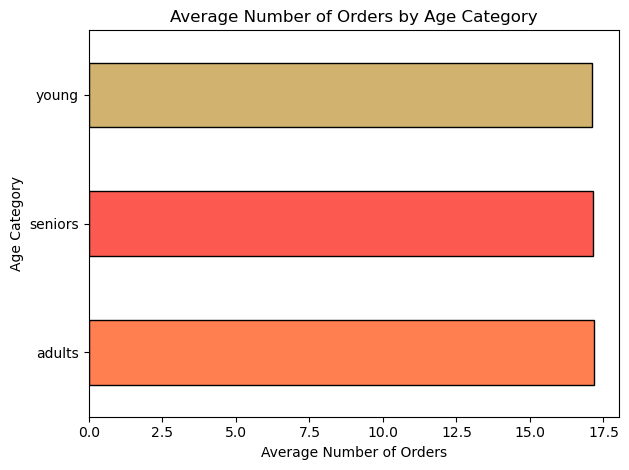

In [77]:
# Group age category and average number of orders
avg_orders_by_age=df_instacart.groupby('age_category')['order_number'].mean()

# Creating bar chart for average number of orders by age category
colors_age=['#ff7f50', '#fc5a50', '#d1b26f']
bar_avg_orders_by_age=avg_orders_by_age.plot(kind='barh', stacked = False, edgecolor = 'black', color=colors_age)
plt.title('Average Number of Orders by Age Category')
plt.xlabel('Average Number of Orders')
plt.ylabel('Age Category')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_avg_orders_by_age.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

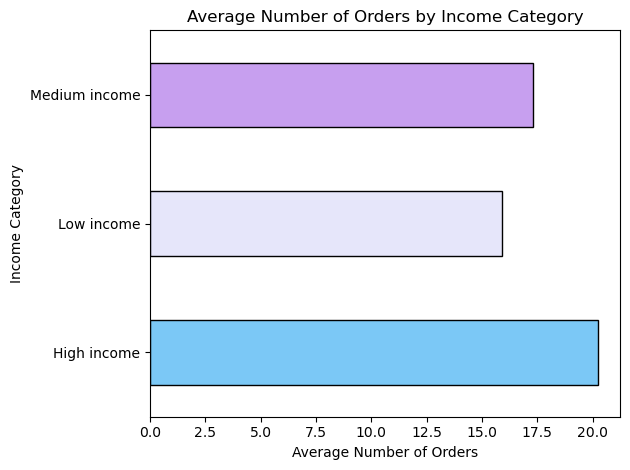

In [78]:
# Group income category and average number of orders
avg_orders_by_income=df_instacart.groupby('income_category')['order_number'].mean()

# Creating bar chart for average number of orders by income category
colors_income=['#7bc8f6', '#e6e6fa', '#c79fef']
bar_avg_orders_by_income=avg_orders_by_income.plot(kind='barh', stacked = False, edgecolor = 'black', color=colors_income)
plt.title('Average Number of Orders by Income Category')
plt.xlabel('Average Number of Orders')
plt.ylabel('Income Category')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_avg_orders_by_income.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

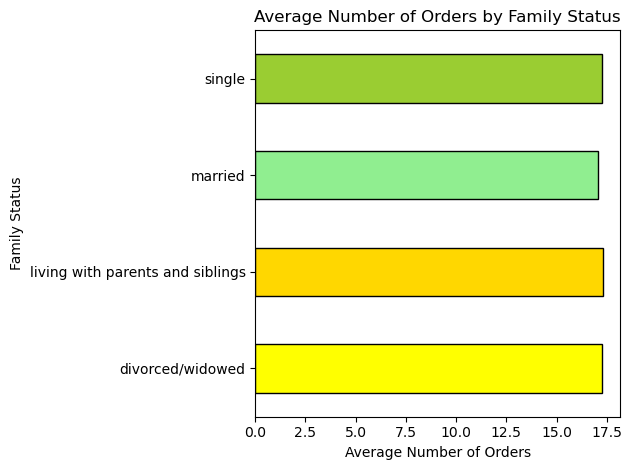

In [79]:
# Group family category and average number of orders
avg_orders_by_family_status=df_instacart.groupby('family_status')['order_number'].mean()

# Creating bar chart for average number of orders by family_status
colors_family=['#ffff00', '#ffd700', '#90ee90', '#9acd32']
bar_avg_orders_by_family_status=avg_orders_by_family_status.plot(kind='barh', stacked = False, edgecolor = 'black', color=colors_family)
plt.title('Average Number of Orders by Family Status')
plt.xlabel('Average Number of Orders')
plt.ylabel('Family Status')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_avg_orders_family_status.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

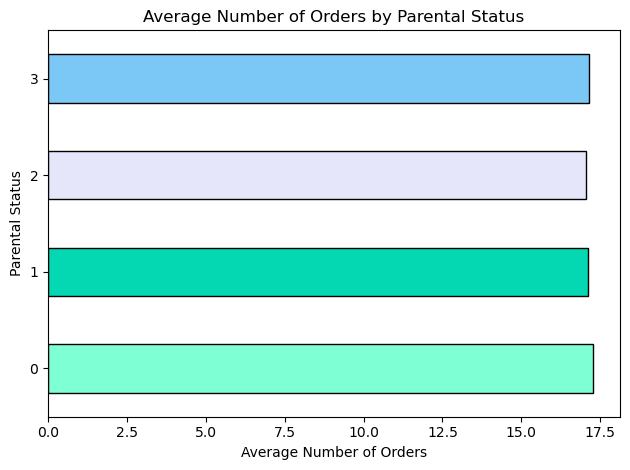

In [80]:
# Group by the number of dependants and average number of orders
avg_orders_by_dependants=df_instacart.groupby('number_dependants')['order_number'].mean()

# Creating bar chart for average number of orders by parental status
colors_dependants=['#7fffd4', '#04d8b2', '#e6e6fa', '#7bc8f6']
bar_avg_orders_by_dependants=avg_orders_by_dependants.plot(kind='barh', stacked = False, edgecolor = 'black', color=colors_dependants)
plt.title('Average Number of Orders by Parental Status')
plt.xlabel('Average Number of Orders')
plt.ylabel('Parental Status')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_avg_orders_by_dependants.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

### 4.4. Creating charts for average price in the orders by categories (age, income, family status)

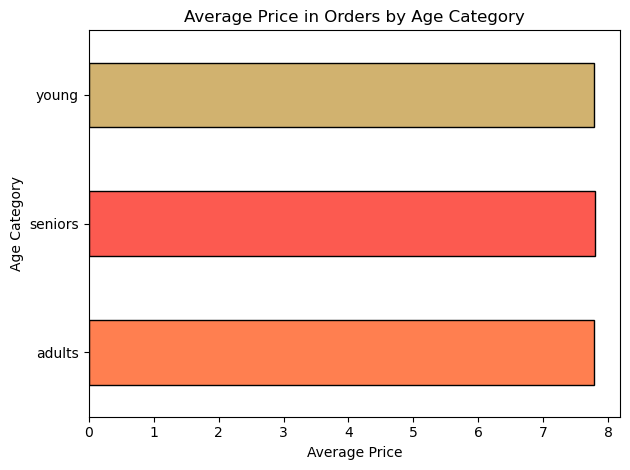

In [83]:
# Group age category and average price in the orders
avg_price_by_age=df_instacart.groupby('age_category')['prices'].mean()

# Creating bar chart for average price in orders by age category
colors_age=['#ff7f50', '#fc5a50', '#d1b26f']
bar_avg_price_by_age=avg_price_by_age.plot(kind='barh', stacked = False, edgecolor = 'black', color=colors_age)
plt.title('Average Price in Orders by Age Category')
plt.xlabel('Average Price')
plt.ylabel('Age Category')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_avg_price_by_age.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

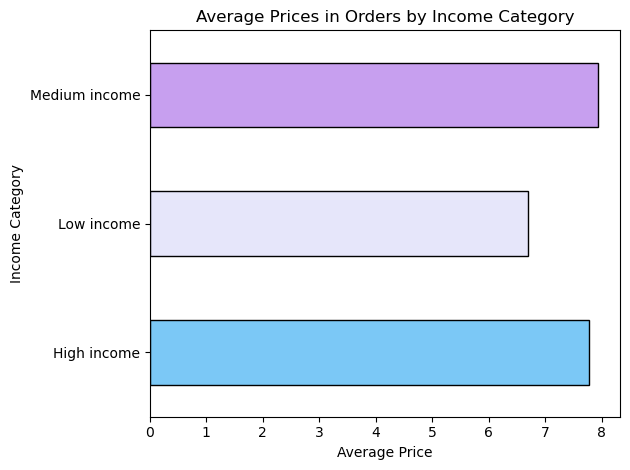

In [84]:
# Group income category and average price in orders
avg_price_by_income=df_instacart.groupby('income_category')['prices'].mean()

# Creating bar chart for average price in orders by income category
colors_income=['#7bc8f6', '#e6e6fa', '#c79fef']
bar_avg_price_by_income=avg_price_by_income.plot(kind='barh', stacked = False, edgecolor = 'black', color=colors_income)
plt.title('Average Prices in Orders by Income Category')
plt.xlabel('Average Price')
plt.ylabel('Income Category')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_avg_price_by_income.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

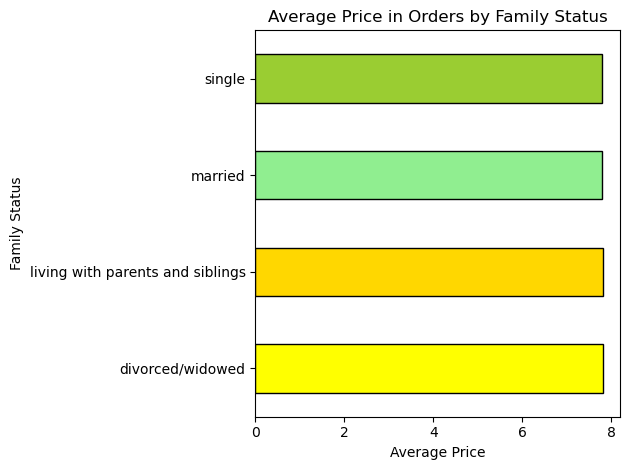

In [85]:
# Group family category and average price in orders
avg_price_by_family_status=df_instacart.groupby('family_status')['prices'].mean()

# Creating bar chart for average price in orders by family status
colors_family=['#ffff00', '#ffd700', '#90ee90', '#9acd32']
bar_avg_price_by_family_status=avg_price_by_family_status.plot(kind='barh', stacked = False, edgecolor = 'black', color=colors_family)
plt.title('Average Price in Orders by Family Status')
plt.xlabel('Average Price')
plt.ylabel('Family Status')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_avg_price_family_status.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

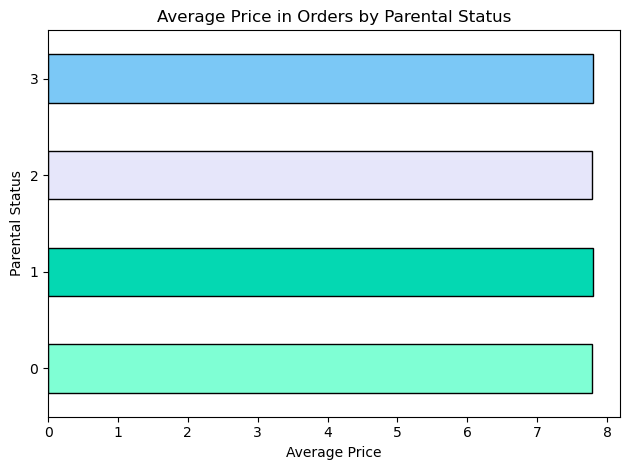

In [87]:
# Group by the number of dependants and average price orders
avg_price_by_dependants=df_instacart.groupby('number_dependants')['prices'].mean()

# Creating bar chart for average price orders by parental status
colors_dependants=['#7fffd4', '#04d8b2', '#e6e6fa', '#7bc8f6']
bar_avg_price_by_dependants=avg_price_by_dependants.plot(kind='barh', stacked = False, edgecolor = 'black', color=colors_dependants)
plt.title('Average Price in Orders by Parental Status')
plt.xlabel('Average Price')
plt.ylabel('Parental Status')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_avg_price_by_dependants.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

### 4.5. Creating charts for average number of days since prior order by categories (age, income, family status)

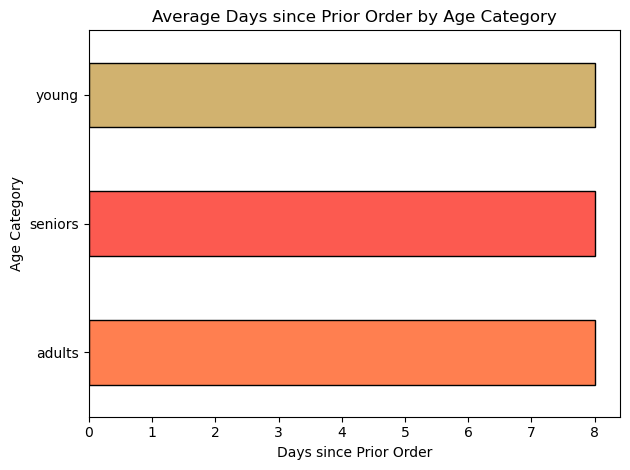

In [91]:
# Group age category and avg number of days since prior order
avg_prior_order_by_age=df_instacart.groupby('age_category')['days_since_prior_order'].median()

# Creating bar chart for avg number of days since prior order by age category
colors_age=['#ff7f50', '#fc5a50', '#d1b26f']
bar_avg_prior_order_by_age=avg_prior_order_by_age.plot(kind='barh', stacked = False, edgecolor = 'black', color=colors_age)
plt.title('Average Days since Prior Order by Age Category')
plt.xlabel('Days since Prior Order')
plt.ylabel('Age Category')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_avg_prior_order_by_age.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

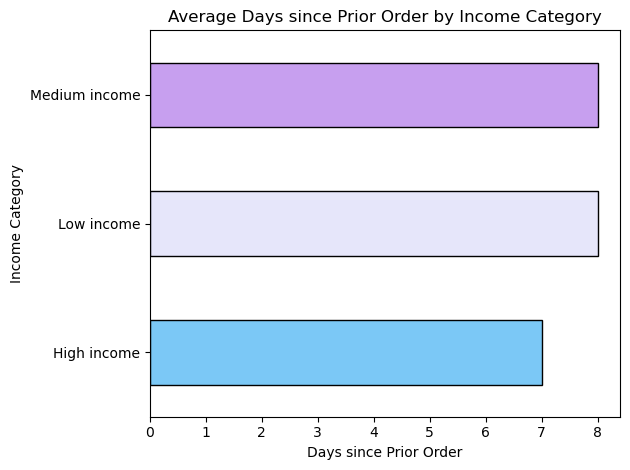

In [92]:
# Group income category and avg number of days since prior order
avg_prior_order_by_income=df_instacart.groupby('income_category')['days_since_prior_order'].median()

# Creating bar chart for avg number of days since prior order by income category
colors_income=['#7bc8f6', '#e6e6fa', '#c79fef']
bar_avg_prior_order_by_income=avg_prior_order_by_income.plot(kind='barh', stacked = False, edgecolor = 'black', color=colors_income)
plt.title('Average Days since Prior Order by Income Category')
plt.xlabel('Days since Prior Order')
plt.ylabel('Income Category')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_avg_prior_order_by_income.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

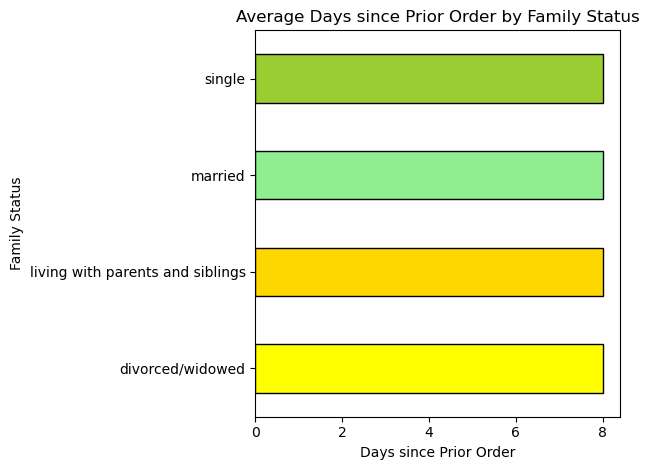

In [93]:
# Group family category and avg number of days since prior order
avg_prior_order_by_family_status=df_instacart.groupby('family_status')['days_since_prior_order'].median()

# Creating bar chart for avg number of days since prior order by family_status
colors_family=['#ffff00', '#ffd700', '#90ee90', '#9acd32']
bar_avg_prior_order_by_family_status=avg_prior_order_by_family_status.plot(kind='barh', stacked = False, edgecolor = 'black', color=colors_family)
plt.title('Average Days since Prior Order by Family Status')
plt.xlabel('Days since Prior Order')
plt.ylabel('Family Status')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_avg_prior_order_family_status.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

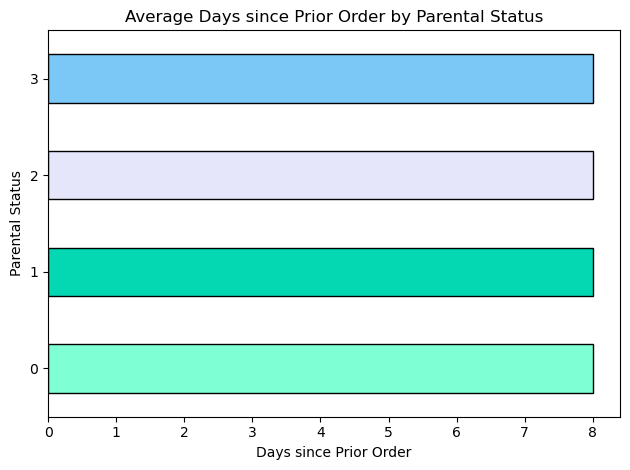

In [94]:
# Group by the number of dependants and avg number of days since prior order
avg_prior_order_by_dependants=df_instacart.groupby('number_dependants')['days_since_prior_order'].median()

# Creating bar chart for average number of days since prior order by parental status
colors_dependants=['#7fffd4', '#04d8b2', '#e6e6fa', '#7bc8f6']
bar_avg_prior_order_by_dependants=avg_prior_order_by_dependants.plot(kind='barh', stacked = False, edgecolor = 'black', color=colors_dependants)
plt.title('Average Days since Prior Order by Parental Status')
plt.xlabel('Days since Prior Order')
plt.ylabel('Parental Status')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_avg_prior_order_by_dependants.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

### 4.6. Creating charts for income generated by categories (age, income, family status)

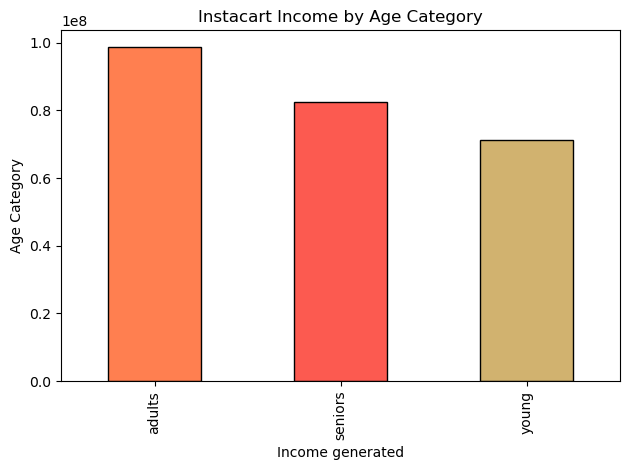

In [97]:
# Group age category and total income generated / price paid by customers
sum_income_by_age=df_instacart.groupby('age_category')['prices'].sum()

# Creating bar chart for income generated by age category
colors_age=['#ff7f50', '#fc5a50', '#d1b26f']
bar_sum_income_by_age=sum_income_by_age.plot(kind='bar', stacked = False, edgecolor = 'black', color=colors_age)
plt.title('Instacart Income by Age Category')
plt.xlabel('Income generated')
plt.ylabel('Age Category')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_sum_income_by_age.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

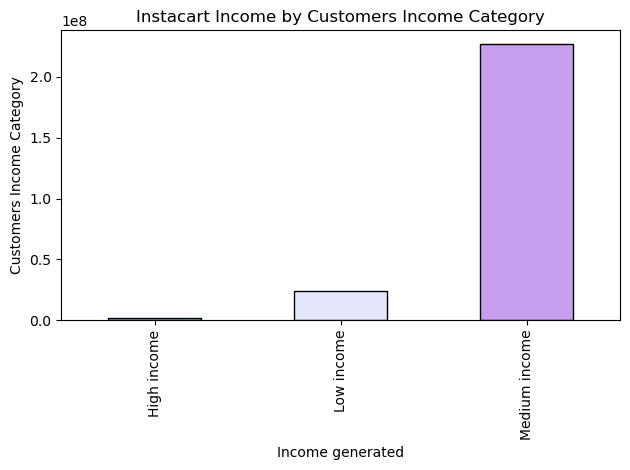

In [99]:
# Group income category and total income generated / price paid by customers
sum_income_by_income=df_instacart.groupby('income_category')['prices'].sum()

# Creating bar chart for price paid by customers by income category
colors_income=['#7bc8f6', '#e6e6fa', '#c79fef']
bar_sum_income_by_income=sum_income_by_income.plot(kind='bar', stacked = False, edgecolor = 'black', color=colors_income)
plt.title('Instacart Income by Customers Income Category')
plt.xlabel('Income generated')
plt.ylabel('Customers Income Category')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_sum_income_by_income.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

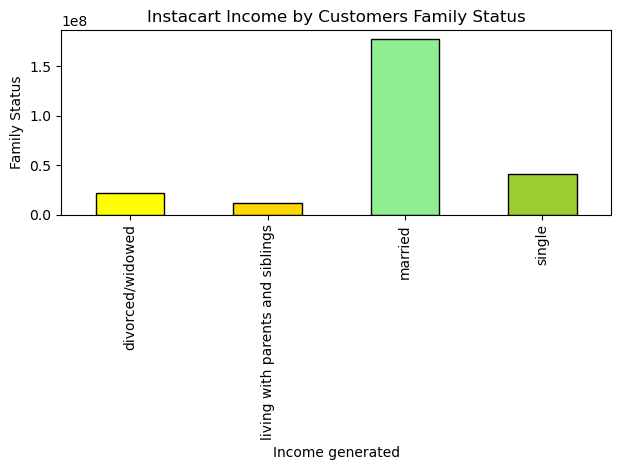

In [100]:
# Group family category and total income generated / price paid by customers
sum_income_by_family_status=df_instacart.groupby('family_status')['prices'].sum()

# Creating bar chart for total income generated by customers by family_status
colors_family=['#ffff00', '#ffd700', '#90ee90', '#9acd32']
bar_sum_income_by_family_status=sum_income_by_family_status.plot(kind='bar', stacked = False, edgecolor = 'black', color=colors_family)
plt.title('Instacart Income by Customers Family Status')
plt.xlabel('Income generated')
plt.ylabel('Family Status')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_sum_income_family_status.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

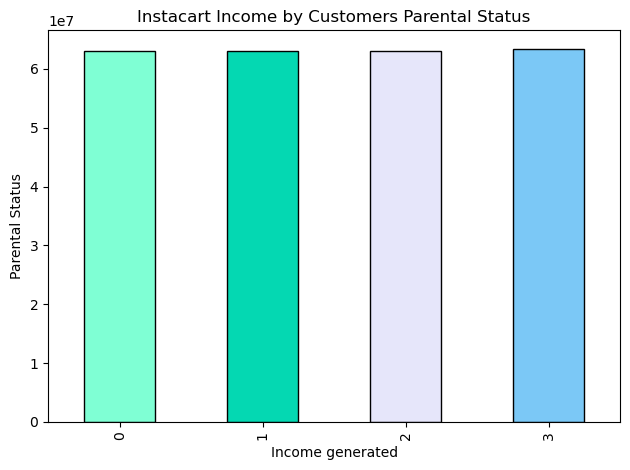

In [101]:
# Group by the number of dependants and otal income generated / price paid by customers
sum_income_by_dependants=df_instacart.groupby('number_dependants')['prices'].sum()

# Creating bar chart for total income generated by customers by parental status
colors_dependants=['#7fffd4', '#04d8b2', '#e6e6fa', '#7bc8f6']
bar_sum_income_by_dependants=sum_income_by_dependants.plot(kind='bar', stacked = False, edgecolor = 'black', color=colors_dependants)
plt.title('Instacart Income by Customers Parental Status')
plt.xlabel('Income generated')
plt.ylabel('Parental Status')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_sum_income_by_dependants.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()